# Computer Vision Midterm Project

### Jiwoo Hwang (5211524)

- Used language : Python

- Used library : openCV

## 1. Loading My Images

- My target = fish

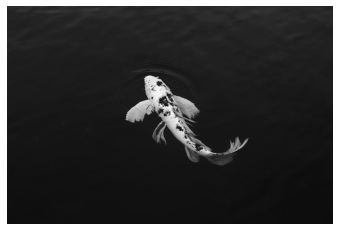

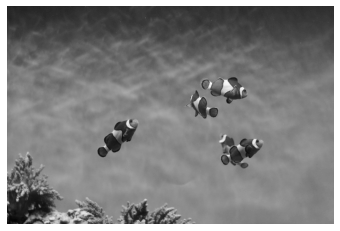

In [556]:
import cv2

import matplotlib.pyplot as plt

# load my fish images

img1 = cv2.imread('fish1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('fish2.jpg', cv2.IMREAD_GRAYSCALE)

# show images below by using matplotlib module

plt.axis('off')
plt.imshow(img1, cmap='gray') 
plt.show()

plt.axis('off')
plt.imshow(img2, cmap='gray') 
plt.show()

## Histogram of my images

- To see whether they are similar or not

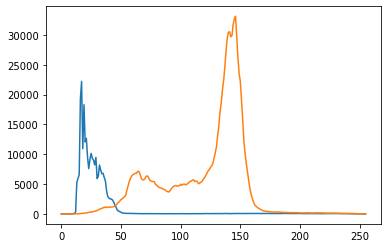

In [567]:
## This part is not essentially part of my algorithm.

import cv2

import matplotlib.pylab as plt

# load my fish images

img1 = cv2.imread('fish1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('fish2.jpg', cv2.IMREAD_GRAYSCALE)

# draw histograms of the images using cv2.calcHist()

hist1 = cv2.calcHist([img1], [0], None, [256], [0,256])
plt.plot(hist1)

hist2 = cv2.calcHist([img2], [0], None, [256], [0,256])
plt.plot(hist2)

# blue line shows img1(fish1), and yellow shows img2(fish2)

If we look at the histogram, we know that their intensities are clustered.

However, their peaks are too different to fix my threshold value.

Therefore, I will try using otsu's algorithm to effectively set threshold values for my images instead of manually setting one threshold value.

## 2. Otsu's Binarization Method
> cv2.threshold()

In [558]:
import cv2

import matplotlib.pylab as plt

# load my images
img1 = cv2.imread('fish1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('fish2.jpg', cv2.IMREAD_GRAYSCALE)
 
# Otsu's algorithm
t1, t1_otsu = cv2.threshold(img1, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
t2, t2_otsu = cv2.threshold(img2, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU)

print('otsu threshold - fish1.jpg:', t1)   # printing out threshold value that Otsu's algorithm found out
print('otsu threshold - fish2.jpg:', t2)

imgs1 = {'Original': img1, 'otsu:%d'%t1: t1_otsu}
imgs2 = {'Original': img2, 'otsu:%d'%t2: t2_otsu}


otsu threshold - fish1.jpg: 99.0
otsu threshold - fish2.jpg: 107.0


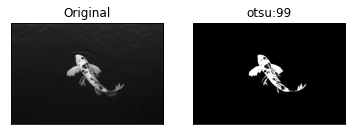

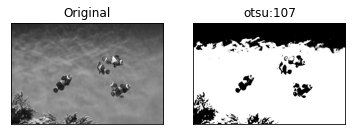

In [559]:
for i , (key, value) in enumerate(imgs1.items()):
    plt.subplot(1, 2, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

for i , (key, value) in enumerate(imgs2.items()):
    plt.subplot(1, 2, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

Now Otsu's algorithm found out threshold values of 99 and 107 would be ideal for my fish images.

## 3. Gaussian Filter

> cv2.GaussianBlur()

Before actually detecting the edges of my object, I'll blur out my images so I can get rid of any unnecessary noises.

I decided to use gaussian filter to blur my images because my images don't seem to have salt and pepper noises which needs median filter. 

In [560]:
import cv2

import matplotlib.pylab as plt

# load my images

img1 = cv2.imread('fish1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('fish2.jpg', cv2.IMREAD_GRAYSCALE)


# blur my images

blur1 = cv2.GaussianBlur(img1, (7,7), 0)
blur2 = cv2.GaussianBlur(img2, (7,7), 0)

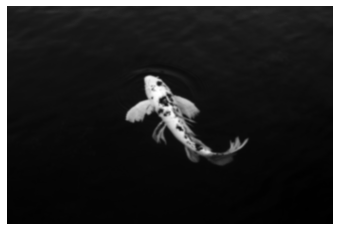

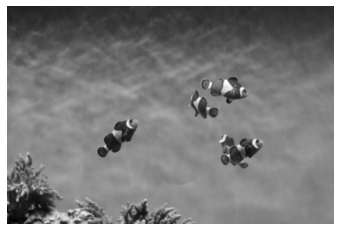

In [561]:
plt.axis('off')
plt.imshow(blur1, cmap='gray') 
plt.show()

plt.axis('off')
plt.imshow(blur2, cmap='gray') 
plt.show()

## 4. Edge detection

- To detect edges of my fish, I will use canny edge detector.

- Will be using threshold values I got from Otsu's algorithm.

> cv2.Canny()

1. Lower threshold : 30 / Upper threshold : t1(99)
2. Lower threshold : 30 / Upper threshold : t2(107)

- Any value that is less than 30 won't be considered as and edge and any value that is larger than 99 will be considered as an edge. Any value between 30 and 99 will be considered as an edge or not depending on the connectivity to the edge which is above 99.

- I put mask size of 3 which is known as default value.

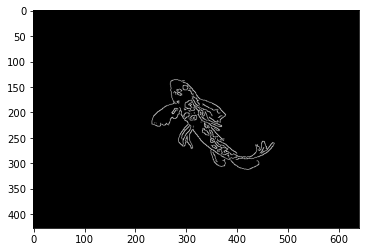

In [562]:
canny1 = cv2.Canny(blur1,30,t1,3)
plt.imshow(canny1, cmap = 'gray')

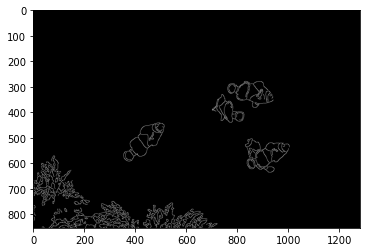

In [563]:
canny2 = cv2.Canny(blur2,30,t2,3)
plt.imshow(canny2, cmap = 'gray')


- The edges are detected pretty well, but there are still some gaps between the edges. I'm going to handle this by using morphological method.

## 5. Morphological Process : Dilation





- I need to connect my edges, so I am using dilation.

>cv2.morphologyEX()

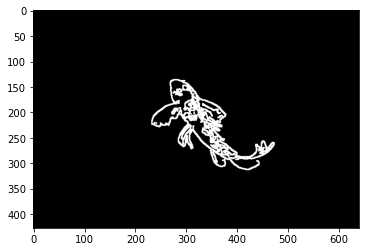

In [564]:
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #making SE of 3*3
fish_1 = cv2.dilate(canny1, k)
plt.imshow(fish_1, cmap = 'gray')

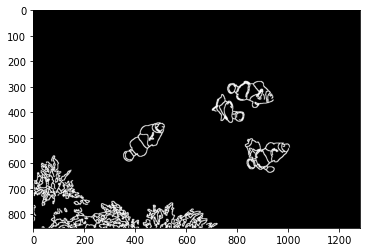

In [565]:
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #making SE of 3*3
fish_2 = cv2.dilate(canny2, k)
plt.imshow(fish_2, cmap = 'gray')

- Now all the processes of my object segmentation ended.


## The End!

## 